# Credit One

## Preprocesamiento del Set

### Inicialización de librerias

In [2]:

import pandas as pd
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split 

#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split



### Carga de información

In [3]:
credit = pd.read_csv('D:\Personal\Cenfotec\Modulo 5\Fuente\default of credit card clients.csv', header =1)

# Pre Procesamiento

### Se renombran las columnas para mejor entendimiento

### Se modifican los valores por su prosa en busqueda de un mejor entendimiento de la información.

In [4]:
credit=credit.rename(columns={"PAY_0": "PAY_April", "PAY_2": "PAY_May", "PAY_3": "PAY_Jun", "PAY_4": "PAY_Jul", "PAY_5": "PAY_Aug", "PAY_6": "PAY_Set"})
credit=credit.rename(columns={"BILL_AMT1": "BILL_AMT_Set", "BILL_AMT2": "BILL_AMT_Aug", "BILL_AMT3": "BILL_AMT_Jul", "BILL_AMT4": "BILL_AMT_Jun", "BILL_AMT5": "BILL_AMT_May", "BILL_AMT6": "BILL_AMT_Abril"})
credit=credit.rename(columns={"PAY_AMT1": "PAY_AMT_Set", "PAY_AMT2": "PAY_AMT_Aug", "PAY_AMT3": "PAY_AMT_Jul", "PAY_AMT4": "PAY_AMT_Jun", "PAY_AMT5": "PAY_AMT_May", "PAY_AMT6": "PAY_AMT_Abril"})
credit=credit.rename(columns={"default payment next month": "DEFAULT"})

### Al ser un módelo de Clasificación, Se cambian variables a catagoricas

In [5]:
credit=credit.astype({'SEX':'category','AGE':'category','EDUCATION':'category','MARRIAGE':'category','PAY_April':'category','PAY_May':'category','PAY_Jun':'category','PAY_Jul':'category','PAY_Aug':'category','PAY_Set':'category','DEFAULT':'category'})

In [88]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_April,PAY_May,PAY_Jun,PAY_Jul,...,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Abril,PAY_AMT_Set,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Abril,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Revisión de Datos Faltantes

In [6]:
total = credit.isnull().sum().sort_values(ascending = False)
percent = (credit.isnull().sum()/credit.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,DEFAULT,PAY_Set,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_April,PAY_May,PAY_Jun,...,BILL_AMT_Jul,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Abril,PAY_AMT_Set,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Matriz de Correlación

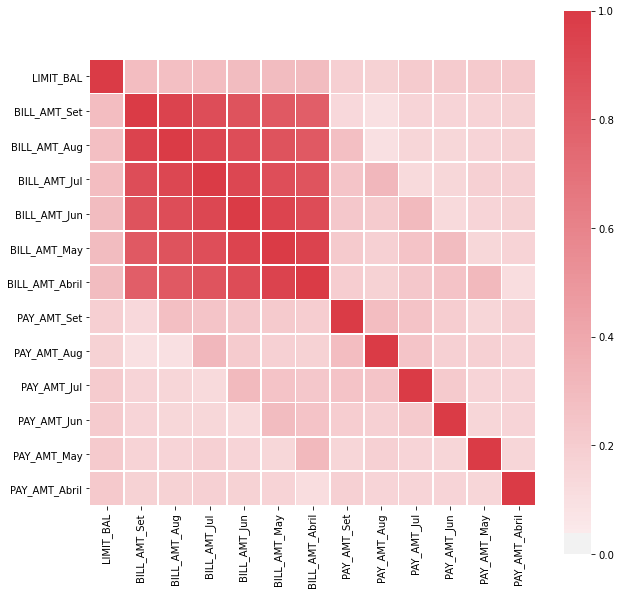

In [7]:
import seaborn as sns

corr = credit.drop('ID',axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

In [8]:
covMat = credit.iloc[:,1:10].cov () 
print (covMat)

              LIMIT_BAL
LIMIT_BAL  1.683446e+10


In [9]:
#features
features = credit.iloc[:,1:10]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_April,PAY_May,PAY_Jun,PAY_Jul
0,20000,2,2,1,24,2,2,-1,-1
1,120000,2,2,2,26,-1,2,0,0
2,90000,2,2,2,34,0,0,0,0
3,50000,2,2,1,37,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0


In [10]:
#dependent variable
depVar = credit['DEFAULT']

# Split de información en Train y Test

In [11]:
X_train, X_test,y_train, y_test = train_test_split(features,depVar)

In [12]:
X_train.shape, X_test.shape 

((22500, 9), (7500, 9))

In [13]:
y_train.shape, y_test.shape

((22500,), (7500,))

### Definición de Parametros de los Algortimos que se utilizaran para el modelado

In [14]:
ModelRF = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=200,
                             verbose=False)

ModelADA=AdaBoostClassifier(random_state=2018,
                             algorithm='SAMME.R',
                             learning_rate=0.8,
                             n_estimators=200)

ModelSVM=svm.SVC(C=1.0,
                verbose=False,
                random_state=2018,
                )

# Random Forest

In [15]:
ModelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [16]:
print(cross_val_score(ModelRF, X_train, y_train))

[0.78244444 0.78533333 0.78355556 0.792      0.78555556]


In [17]:
ModelRF.score (X_train, y_train)

0.9612888888888889

# AdaBoostClassifier

In [18]:
ModelADA.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=200, random_state=2018)

In [19]:
print(cross_val_score(ModelADA, X_train, y_train))

[0.81888889 0.81       0.81555556 0.81377778 0.81933333]


In [20]:
ModelADA.score (X_train, y_train)

0.8176888888888889

# SVM

In [21]:
ModelSVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=2018, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
print(cross_val_score(ModelSVM, X_train, y_train))

[0.77822222 0.778      0.778      0.778      0.778     ]


In [23]:
ModelSVM.score (X_train, y_train)

0.7780444444444444

# Prediccion

In [24]:
#Make Predictions
predictions = ModelADA.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.021
RMSE: 0.418


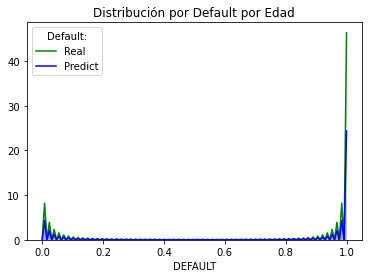

In [33]:

fig,ax=plt.subplots()
sns.distplot(y_test,
            hist=False, color='green',
            kde_kws={"shade":True},
            ax=ax, label='Real')
sns.distplot(predictions,
            hist=False, color='blue',
            kde_kws={"shade":True},
            ax=ax, label='Predict')
ax.set_title("Distribución por Default por Edad")
ax.legend(title='Default:')